In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/RIASEC_Dataset_preprocessed.csv')

In [3]:
vectorizer = TfidfVectorizer(stop_words='english')
X_major = vectorizer.fit_transform(df['major'])

In [4]:
feature_names = vectorizer.get_feature_names_out()
X_dense = X_major.toarray()
df_vector = pd.DataFrame(X_dense, columns=feature_names)
pd.set_option('display.max_columns', None)
print(df_vector.head())

    aa  aacounting  aas  aattended   ab  aba  abd  abec  abm  aboriginal  \
0  0.0         0.0  0.0        0.0  0.0  0.0  0.0   0.0  0.0         0.0   
1  0.0         0.0  0.0        0.0  0.0  0.0  0.0   0.0  0.0         0.0   
2  0.0         0.0  0.0        0.0  0.0  0.0  0.0   0.0  0.0         0.0   
3  0.0         0.0  0.0        0.0  0.0  0.0  0.0   0.0  0.0         0.0   
4  0.0         0.0  0.0        0.0  0.0  0.0  0.0   0.0  0.0         0.0   

   aboult  abs  abuse  acadamy  academic  academics  academy  acadmic  acc  \
0     0.0  0.0    0.0      0.0       0.0        0.0      0.0      0.0  0.0   
1     0.0  0.0    0.0      0.0       0.0        0.0      0.0      0.0  0.0   
2     0.0  0.0    0.0      0.0       0.0        0.0      0.0      0.0  0.0   
3     0.0  0.0    0.0      0.0       0.0        0.0      0.0      0.0  0.0   
4     0.0  0.0    0.0      0.0       0.0        0.0      0.0      0.0  0.0   

   accaountancy  accointing  acconting  accou  accoumtimg  accounant  \
0 

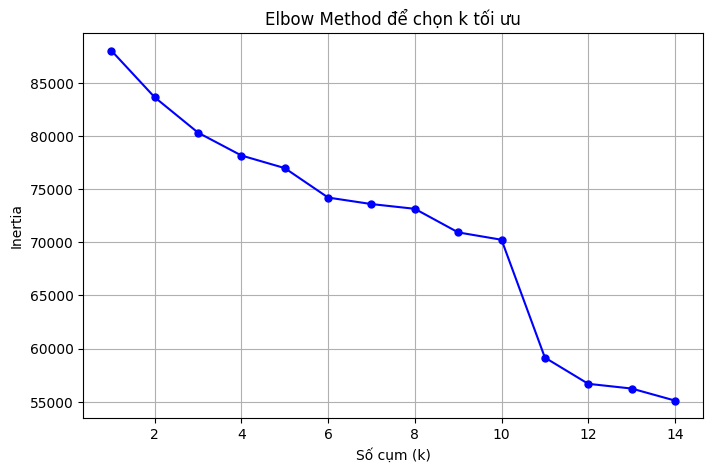

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tìm k tốt nhất bằng elbow
inertia = []
k_range = range(1, 15)  # thử từ 1 đến 14 cụm
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_major)
    inertia.append(kmeans.inertia_)

# Vẽ đồ thị elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=5)
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để chọn k tối ưu')
plt.grid(True)
plt.show()



In [6]:
# Chọn k tối ưu (ví dụ anh nhìn đồ thị thấy elbow tại k=5)
optimal_k = 12  # chỉnh lại theo kết quả elbow của anh

n_clusters = optimal_k

# Phân cụm với k tối ưu
kmeans = KMeans(n_clusters, random_state=42)
df['major_cluster'] = kmeans.fit_predict(X_major)

# Nếu X_major có 2 chiều thì vẽ scatter plot
if X_major.shape[1] == 2:
    plt.figure(figsize=(8, 5))
    plt.scatter(X_major[:, 0], X_major[:, 1], c=df['major_cluster'], cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                color='black', marker='x', label='Cluster Centers')
    plt.title(f'KMeans Clustering (k={optimal_k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


In [7]:
for i in range(n_clusters):
    print(f"\n--- Cluster {i} ---")
    print(df[df['major_cluster'] == i]['major'].value_counts().head(5))



--- Cluster 0 ---
major
psychology           13879
eg psychology            3
psychology it            1
psychology please        1
g psychology             1
Name: count, dtype: int64

--- Cluster 1 ---
major
business                   3848
business administration     830
international business      138
business studies             33
business marketing           31
Name: count, dtype: int64

--- Cluster 2 ---
major
music               487
music education      77
music business       18
music therapy        12
music production     11
Name: count, dtype: int64

--- Cluster 3 ---
major
english                   3241
english literature          93
psychology english          17
english and psychology      16
psychology and english      15
Name: count, dtype: int64

--- Cluster 4 ---
major
management                   849
business management          698
human resource management    120
hospitality management        83
sports management             50
Name: count, dtype: int64

--- Clust

In [ ]:
df = df[~df['major_cluster'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]


# Trong Cluster 6 chỉ giữ "computer science"
mask_cluster_6 = (df['major_cluster'] == 6)
mask_not_computer_science = (df['major'] != 'computer science')
df = df[~(mask_cluster_6 & mask_not_computer_science)]

# Reset index sau khi xoá
df.reset_index(drop=True, inplace=True)

print(f"✅ Dataset sau khi lọc: {df.shape[0]} dòng, {df['major_cluster'].nunique()} cluster")
print("📊 Các cluster còn lại:", sorted(df['major_cluster'].unique()))



✅ Dataset sau khi lọc: 19835 dòng, 2 cluster
📊 Các cluster còn lại: [np.int32(0), np.int32(11)]


In [9]:
for i in range(n_clusters):
    print(f"\n--- Cluster {i} ---")
    print(df[df['major_cluster'] == i]['major'].value_counts().head(5))



--- Cluster 0 ---
major
psychology           13879
eg psychology            3
psychology it            1
psychology please        1
g psychology             1
Name: count, dtype: int64

--- Cluster 1 ---
Series([], Name: count, dtype: int64)

--- Cluster 2 ---
Series([], Name: count, dtype: int64)

--- Cluster 3 ---
Series([], Name: count, dtype: int64)

--- Cluster 4 ---
Series([], Name: count, dtype: int64)

--- Cluster 5 ---
Series([], Name: count, dtype: int64)

--- Cluster 6 ---
Series([], Name: count, dtype: int64)

--- Cluster 7 ---
Series([], Name: count, dtype: int64)

--- Cluster 8 ---
Series([], Name: count, dtype: int64)

--- Cluster 9 ---
Series([], Name: count, dtype: int64)

--- Cluster 10 ---
Series([], Name: count, dtype: int64)

--- Cluster 11 ---
major
engineering               1504
civil engineering         1111
mechanical engineering     770
electrical engineering     497
chemical engineering       423
Name: count, dtype: int64


In [10]:
print(df[['major', 'major_cluster']].head(100))

                major  major_cluster
0          psychology              0
1   civil engineering             11
2          psychology              0
3          psychology              0
4          psychology              0
..                ...            ...
95         psychology              0
96         psychology              0
97         psychology              0
98         psychology              0
99         psychology              0

[100 rows x 2 columns]


In [11]:
df = df.drop(columns=['major'])
df.to_csv('../datasets/RIASEC_Dataset_clustered_v2.csv', index=False)